#### Modeling the YRBSS: Target Q 15; Felt Unsafe at School or on Way to or From School, 1 or more days in last 30

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
colors = ['#b166eb', '#8858D4', '#664CC1', '#4B43B2', '#072B8B']
sns.set_palette(colors)

from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection 
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score, recall_score

# from scipy.stats import 
# import statsmodels.api as sm

In [53]:
sex = pd.read_csv('data/sex.csv')

In [54]:
sex.q58.unique()

array([0., 1.])

In [55]:
sex.drop(columns=['sitename', 'year'], inplace=True)

In [56]:
sex.q58.value_counts(normalize=True)

0.0    0.623655
1.0    0.376345
Name: q58, dtype: float64

In [57]:
y = sex.pop('q58')

In [58]:
X = sex.copy()

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [60]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((188784, 25), (47196, 25), (188784,), (47196,))

In [61]:
y_train.sum() / len(X_train), y_test.sum() / len(X_test)

(0.3763454530044919, 0.3763454530044919)

Source for the run_experiments code: https://towardsdatascience.com/quickly-test-multiple-models-a98477476f0

In [38]:
def run_experiments(X_train: pd.DataFrame, y_train: pd.DataFrame, 
                   X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame: 
    dfs = []
    models = [
        ('LogReg', LogisticRegression()),
        ('RF', RandomForestClassifier()), 
        ('KNN', KNeighborsClassifier()), 
        ('SVM', SVC()), 
        ('GNB', GaussianNB()), 
        ('XGB', XGBClassifier())
    ]
    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 
               'f1_weighted', 'roc_auc']
    target_names = ['Never Had Sex', 'Have Had Sex']
    for name, model in models: 
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred, 
                                   target_names = target_names))
        results.append(cv_results)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
    
    final = pd.concat(dfs, ignore_index=True)
    return final

DO NOT RERUN NEXT CELL

In [39]:
# took a looooooong time to run, don't rerun :) 

run_experiments(X_train, y_train, X_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

LogReg
               precision    recall  f1-score   support

Never Had Sex       0.76      0.86      0.81     29434
 Have Had Sex       0.71      0.56      0.63     17762

     accuracy                           0.75     47196
    macro avg       0.74      0.71      0.72     47196
 weighted avg       0.75      0.75      0.74     47196

RF
               precision    recall  f1-score   support

Never Had Sex       0.85      0.88      0.87     29434
 Have Had Sex       0.79      0.75      0.77     17762

     accuracy                           0.83     47196
    macro avg       0.82      0.81      0.82     47196
 weighted avg       0.83      0.83      0.83     47196

KNN
               precision    recall  f1-score   support

Never Had Sex       0.77      0.85      0.81     29434
 Have Had Sex       0.69      0.58      0.63     17762

     accuracy                           0.75     47196
    macro avg       0.73      0.71      0.72     47196
 weighted avg       0.74      0.75      0.7

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedM

SVM
               precision    recall  f1-score   support

Never Had Sex       0.62      1.00      0.77     29434
 Have Had Sex       0.00      0.00      0.00     17762

     accuracy                           0.62     47196
    macro avg       0.31      0.50      0.38     47196
 weighted avg       0.39      0.62      0.48     47196



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GNB
               precision    recall  f1-score   support

Never Had Sex       0.71      0.89      0.79     29434
 Have Had Sex       0.70      0.40      0.51     17762

     accuracy                           0.71     47196
    macro avg       0.70      0.65      0.65     47196
 weighted avg       0.71      0.71      0.69     47196



/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:32:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:32:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:32:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:33:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:33:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:33:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB
               precision    recall  f1-score   support

Never Had Sex       0.80      0.85      0.82     29434
 Have Had Sex       0.72      0.64      0.68     17762

     accuracy                           0.77     47196
    macro avg       0.76      0.75      0.75     47196
 weighted avg       0.77      0.77      0.77     47196



,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,1.197611,0.078982,0.753211,0.749312,0.753211,0.744835,0.815798,LogReg
1,1.256970,0.072492,0.750377,0.747260,0.750377,0.742554,0.817177,LogReg
2,1.323152,0.076410,0.754800,0.750927,0.754800,0.747452,0.815897,LogReg
3,1.365336,0.070918,0.752576,0.748896,0.752576,0.744790,0.818429,LogReg
4,1.184873,0.071686,0.751907,0.747581,0.751907,0.744372,0.815377,LogReg
5,18.441650,2.263808,0.818206,0.816985,0.818206,0.817390,0.888723,RF
6,19.470484,2.328132,0.818550,0.817093,0.818550,0.817271,0.888333,RF
7,19.132283,2.177924,0.818947,0.817565,0.818947,0.817934,0.888986,RF
8,17.576935,2.067484,0.816882,0.815295,0.816882,0.815563,0.888003,RF
9,17.318675,2.014958,0.815129,0.813811,0.815129,0.814233,0.887621,RF


In [40]:
# Initial inspection looks like Random Forest is best bet... 

In [13]:
# Plotly choropleth... get county fips for locations? 

# import plotly.figure_factory as ff

# fips = ['06021', '06023', '06027',
#         '06029', '06033', '06059',
#         '06047', '06049', '06051',
#         '06055', '06061']
# values = range(len(fips))

# fig = ff.create_choropleth(fips=fips, values=values)
# fig.layout.template = None
# fig.show()

In [62]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

In [63]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [64]:
preds = rf.predict(X_test)

In [65]:
print("Accuracy:", accuracy_score(y_test, preds))
print("Precision:", precision_score(y_test, preds))
print("Recall:", recall_score(y_test, preds))
print("F1:", f1_score(y_test, preds))


Accuracy: 0.8243071446732774
Precision: 0.7802770214277258
Recall: 0.7421461547123072
F1: 0.7607340720221607


In [66]:
X.iloc[1], y.iloc[1]

(age       6.000000
 sex       1.000000
 grade     2.000000
 race7     4.000000
 bmi      18.954101
 q8        5.000000
 q12       1.000000
 q13       1.000000
 q15       1.000000
 q16       1.000000
 q17       1.000000
 q25       2.000000
 q26       2.000000
 q28       1.000000
 q29       1.000000
 q30       1.000000
 q32       1.000000
 q33       1.000000
 q40       6.000000
 q41       1.000000
 q46       1.000000
 q47       1.000000
 q50       1.000000
 q79       6.000000
 q81       1.000000
 Name: 1, dtype: float64,
 1.0)

In [68]:
sample = [[6.000000, 1.000000, 
          2.000000, 4.000000, 18.954101, 
          5.000000, 1.000000, 1.000000, 1.000000, 
          1.000000, 1.000000, 2.000000, 2.000000, 
          1.000000, 1.000000, 1.000000, 1.000000, 
          1.000000, 6.000000, 1.000000, 1.000000, 
          1.000000, 1.000000, 6.000000, 1.000000]]

In [71]:
pred_prob = rf.predict_proba(X_test)
pred_prob

array([[0.56, 0.44],
       [0.98, 0.02],
       [0.81, 0.19],
       ...,
       [0.86, 0.14],
       [0.43, 0.57],
       [0.04, 0.96]])

In [72]:
cm = confusion_matrix(y_test, preds, normalize='true')
cm

array([[0.87388734, 0.12611266],
       [0.25785385, 0.74214615]])

In [73]:
y_hat_sex = pred_prob[:, 1]

In [74]:
y_hat_sex

array([0.44, 0.02, 0.19, ..., 0.14, 0.57, 0.96])

In [75]:
fpr, tpr, thresh = roc_curve(y_test, y_hat_sex)

In [76]:
J = tpr-fpr
ix = np.argmax(J)
best_thresh = thresh[ix]
best_thresh

0.4126313566945909

In [77]:
from sklearn.metrics import roc_curve

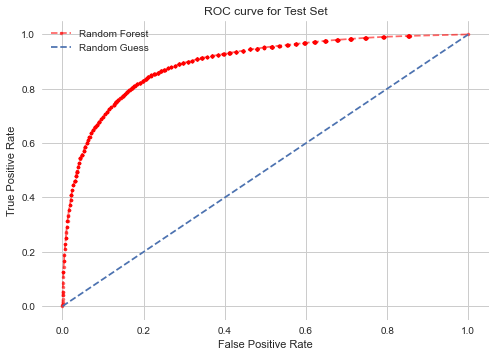

In [78]:
plt.style.use('seaborn')
sns.set_style('whitegrid')

plt.plot(fpr, tpr, linestyle='--',color='red', marker='.', alpha=0.6, label='Random Forest')
plt.plot([0,1], [0,1], linestyle='--', label='Random Guess')

plt.title('ROC curve for Test Set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.show();

In [79]:
from sklearn.metrics import precision_recall_curve

In [80]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)

In [81]:
fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)
print('Best Threshold to balance Precision, Recall = %f, F-Score=%.3f' % (thresh[ix], fscore[ix]))

Best Threshold to balance Precision, Recall = 1.000000, F-Score=0.761


In [83]:
threshold = 0.413

pred_prob = rf.predict_proba(X_test)
predicted = (pred_prob [:, 1] >= threshold).astype('int')
accuracy = accuracy_score(y_test, predicted)
precision = precision_score(y_test, predicted)
recall = recall_score(y_test, predicted)
f1 = f1_score(y_test, predicted)

In [84]:
accuracy, precision, recall, f1

(0.8180142384947877,
 0.7337784800448545,
 0.8104943137034117,
 0.7702308659479414)

In [85]:
thresholds = np.linspace(0, 1, 100)
thresholds = thresholds.round(2)
accuracy = []
recall = []
precision = []
f1 = []
df = pd.DataFrame(index=thresholds)
for thresh in thresholds: 
    pred_prob = rf.predict_proba(X_test)
    predicted = (pred_prob[:, 1] >= thresh).astype('int')
    acc = accuracy_score(y_test, predicted)
    rec = recall_score(y_test, predicted)
    prec = precision_score(y_test, predicted)
    f1sc = f1_score(y_test, predicted)
    accuracy.append(acc)
    recall.append(rec)
    precision.append(prec)
    f1.append(f1sc)

df['accuracy'] = accuracy
df['recall'] = recall
df['precision'] = precision
df['f1'] = f1


Text(0.5, 0, 'Classification Thresholds')

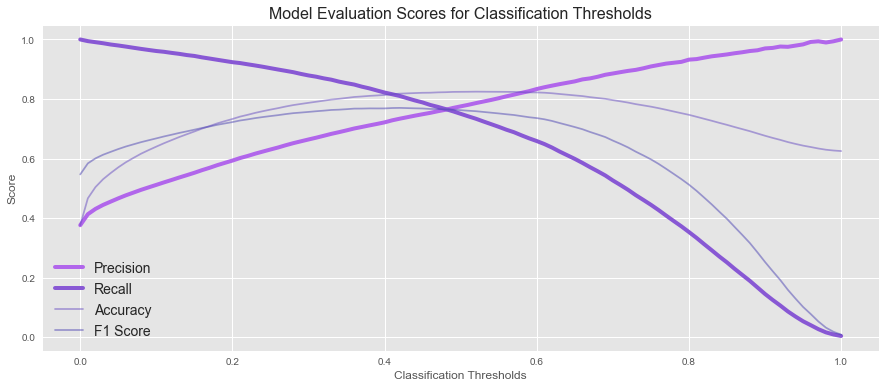

In [90]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.set_style('whitegrid')

sns.lineplot(x=thresholds, y=precision, ax=ax, color=colors[0], label='Precision', linewidth=4)
sns.lineplot(x=thresholds, y=recall, ax=ax, color=colors[1], label='Recall', linewidth=4)
sns.lineplot(x=thresholds, y=accuracy, ax=ax, color=colors[2], label='Accuracy', alpha=0.5)
sns.lineplot(x=thresholds, y=f1, ax=ax, color=colors[3], label='F1 Score', alpha=0.5)
ax.set_title('Model Evaluation Scores for Classification Thresholds', fontsize=16)
ax.legend(fontsize=14)
ax.set_ylabel('Score')
ax.set_xlabel('Classification Thresholds')

In [87]:
X.columns

Index(['age', 'sex', 'grade', 'race7', 'bmi', 'q8', 'q12', 'q13', 'q15', 'q16',
       'q17', 'q25', 'q26', 'q28', 'q29', 'q30', 'q32', 'q33', 'q40', 'q41',
       'q46', 'q47', 'q50', 'q79', 'q81'],
      dtype='object')

In [100]:
X.loc[2]

age       5.000000
sex       2.000000
grade     3.000000
race7     6.000000
bmi      30.161382
q8        1.000000
q12       3.000000
q13       3.000000
q15       1.000000
q16       2.000000
q17       7.000000
q25       1.000000
q26       1.000000
q28       1.000000
q29       1.000000
q30       1.000000
q32       6.000000
q33       4.000000
q40       4.000000
q41       5.000000
q46       4.000000
q47       5.000000
q50       2.000000
q79       4.000000
q81       1.000000
Name: 2, dtype: float64

In [94]:
modes = {'q8': 5.0, 'q12': 1.0, 'q13': 1.0, 
        'q15': 1.0, 'q16': 1.0, 'q17': 1.0, 
        'q25': 2.0, 'q26': 2.0, 'q28': 1.0, 
        'q29': 1.0, 'q30': 2.0, 'q32': 1.0, 
        'q33': 1.0, 'q40': 1.0, 'q41': 1.0, 
        'q46': 1.0, 'q47': 1.0, 'q50': 1.0, 
        'q79': 1.0, 'q81': 1.0}

In [107]:
sample_mu3 = [[3, 2, 1, 4, 29, 5, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

In [108]:
sample_mu5 = [[5, 2, 1, 4, 29, 5, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

In [109]:
rf.predict_proba(sample_mu3), rf.predict_proba(sample_mu5)

(array([[0.97, 0.03]]), array([[0.18, 0.82]]))

In [95]:
rf.feature_importances_

array([0.05290735, 0.01900015, 0.0403001 , 0.05985313, 0.21769775,
       0.03500771, 0.01488863, 0.00381015, 0.01535486, 0.01089306,
       0.03997507, 0.02051258, 0.01393335, 0.00913545, 0.00688416,
       0.02564844, 0.00949017, 0.00657815, 0.08754465, 0.03804871,
       0.09512886, 0.04375611, 0.00509298, 0.07668229, 0.05187616])

In [98]:
important_features = pd.Series(data=rf.feature_importances_, index=X.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features

bmi      0.217698
q46      0.095129
q40      0.087545
q79      0.076682
race7    0.059853
age      0.052907
q81      0.051876
q47      0.043756
grade    0.040300
q17      0.039975
q41      0.038049
q8       0.035008
q30      0.025648
q25      0.020513
sex      0.019000
q15      0.015355
q12      0.014889
q26      0.013933
q16      0.010893
q32      0.009490
q28      0.009135
q29      0.006884
q33      0.006578
q50      0.005093
q13      0.003810
dtype: float64

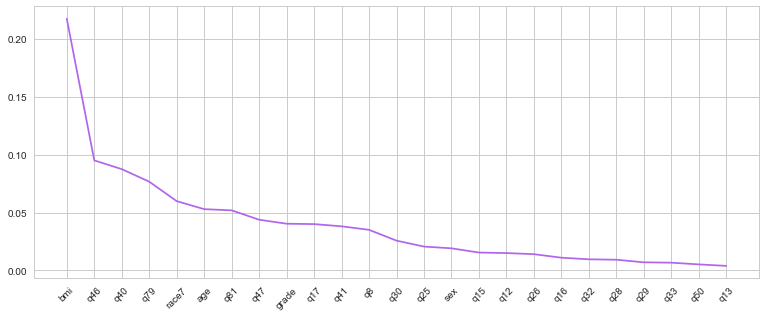

In [99]:
fig, ax = plt.subplots(figsize=(13, 5))
sns.lineplot(data=important_features, ax=ax)
ax.tick_params(axis='x', rotation=45)

In [117]:
param_grid = {'n_estimators': [140, 150, 175], 'criterion': ['gini', 'entropy'], 
             'max_depth': [10, 20, 40], 'max_features': [5, 10, 20]}

In [118]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [119]:
skf = StratifiedKFold()

In [120]:
grid_rf = GridSearchCV(rf, param_grid, cv=skf)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40], 'max_features': [5, 10, 20],
                         'n_estimators': [140, 150, 175]})

In [ ]:
grid_rf.best_estimator_

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=40, max_features=5, n_estimators=175,
                       random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

n_features = X.shape[1]

model = Sequential()
model.add(Dense(20, input_dim=n_features, 
               activation = 'relu', 
               kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', 
               kernel_initializer='he_normal'))
model.add(Dense(n_class, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
             optimizer='adam')
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=2)

yhat = model.predict(X_test)
yhat = argmax(yhat, axis=-1).astype('int')
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)

ModuleNotFoundError: No module named 'tensorflow.keras.models'